In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from sklearn.datasets import load_boston

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [7]:
from sklearn.preprocessing import OneHotEncoder

In [8]:
boston = load_boston();

C:\Users\roman\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [9]:
X = boston.data
df_X = pd.DataFrame(X, columns=boston.feature_names)
df_X.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [10]:
y = boston.target
df_y = pd.DataFrame(y, columns=['MEDV'])
df_y.head(3)

,MEDV
0,24.0
1,21.6
2,34.7


In [11]:
df_boston = pd.concat([df_X, df_y], axis=1)
df_boston.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [12]:
X_train, X_test, y_train, y_test = train_test_split(
 df_boston.iloc[:, :-1], 
 df_boston['MEDV'], 
 test_size=0.25
 )

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
 df_boston.iloc[:, :-1], 
 df_boston['MEDV'], 
 test_size=0.25
 )

In [14]:
linreg = LinearRegression()


In [15]:
linreg.fit(X=X_train, y=y_train) 

LinearRegression()

In [16]:
linreg.intercept_

37.63576919581416

In [17]:
linreg.coef_.round(2)

array([-1.000e-01,  5.000e-02,  6.000e-02,  2.470e+00, -1.698e+01,
        3.620e+00,  0.000e+00, -1.490e+00,  3.100e-01, -1.000e-02,
       -1.010e+00,  1.000e-02, -5.800e-01])

In [18]:
pd.DataFrame(linreg.coef_.round(2), index=X_train.columns, columns=['coef'])

,coef
CRIM,-0.10
ZN,0.05
INDUS,0.06
CHAS,2.47
NOX,-16.98
RM,3.62
AGE,0.00
DIS,-1.49
RAD,0.31
TAX,-0.01


In [19]:
y_out = linreg.predict(X_test)
y_out[:3]

array([12.17916492,  9.43202832, 27.73533301])

In [20]:
r2_score(y_test, y_out).round(2)

0.68

In [21]:
linreg_sm = sm.OLS(y_train, sm.add_constant(X_train, prepend=True))
linreg_sm_model = linreg_sm.fit()
linreg_sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     82.69
Date:                Wed, 21 Dec 2022   Prob (F-statistic):          3.49e-100
Time:                        17:01:08   Log-Likelihood:                -1133.3
No. Observations:                 379   AIC:                             2295.
Df Residuals:                     365   BIC:                             2350.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.6358      6.032      6.239      0.000      25.773      49.498
CRIM          -0.1039      0.036     -2.905      0.004      -0.174      -0.034
ZN             0.0515      0.016      3.143      0.002       0.019       0.084
INDUS          0.0610      0.075      0.811      0.418      -0.087       0.209
CHAS           2.4748      1.005      2.462      0.014       0.498       4.452
NOX          -16.9832      4.510     -3.766      0.000     -25.852      -8.115
RM             3.6180      0.479      7.549      0.000       2.676       4.560
AGE            0.0043      0.016      0.278      0.782      -0.026       0.035
DIS           -1.4917      0.235     -6.360      0.000      -1.953      -1.030
RAD            0.3112      0.077      4.018      0.000       0.159       0.463
TAX           -0.0123      0.004     -2.762      0.006      -0.021      -0.004
PTRATIO       -1.0066      0.154     -6.525      0.000      -1.310      -0.703
B              0.0115      0.003      3.598      0.000       0.005       0.018
LSTAT         -0.5773      0.058     -9.919      0.000      -0.692      -0.463
==============================================================================
Omnibus:                      136.072   Durbin-Watson:                   2.176
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              525.831
Skew:                           1.558   Prob(JB):                    6.57e-115
Kurtosis:                       7.857   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
df = pd.read_csv('data2.txt', sep='\t', decimal=',')
df.head(3)

,X1,X2,Y
0,7.72,7.94,0
1,8.97,9.26,0
2,0.53,4.84,0


In [23]:
X_train, X_test, y_train, y_test = train_test_split(
 df[['X1', 'X2']], 
 df['Y'],
 test_size=0.25
 )

In [24]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((150, 2), (150,), (50, 2), (50,))

In [25]:
logreg = LogisticRegression()

In [26]:
logreg.fit(X=X_train, y=y_train)

LogisticRegression()

In [27]:
logreg.intercept_.round(2)

array([-0.75])

In [28]:
logreg.coef_.round(2)

array([[-0.  ,  0.01]])

In [29]:
y_out = logreg.predict(X_test)
y_out[:3]

array([0, 0, 0], dtype=int64)

In [30]:
y_out_prob = logreg.predict_proba(X_test)
y_out_prob[:3]

array([[0.65460994, 0.34539006],
       [0.67953069, 0.32046931],
       [0.68201938, 0.31798062]])

In [31]:
print('accuracy_score=', accuracy_score(y_true=y_test, y_pred=y_out))

accuracy_score= 0.72


In [32]:
print('recall_score=', recall_score(y_true=y_test, y_pred=y_out))

recall_score= 0.0


In [33]:
print('precision_score=', precision_score(y_true=y_test, y_pred=y_out))

precision_score= 0.0


C:\Users\roman\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
print('f1_score=', f1_score(y_true=y_test, y_pred=y_out))

f1_score= 0.0


In [35]:
print('roc_auc_score=', roc_auc_score(y_true=y_test, y_score=y_out_prob[:, 1]))

roc_auc_score= 0.45039682539682535


In [36]:
print('classification_report:')
print(classification_report(y_true=y_test, y_pred=y_out, target_names=['0','1']))

classification_report:
              precision    recall  f1-score   support

           0       0.72      1.00      0.84        36
           1       0.00      0.00      0.00        14

    accuracy                           0.72        50
   macro avg       0.36      0.50      0.42        50
weighted avg       0.52      0.72      0.60        50



C:\Users\roman\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\roman\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\roman\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
logreg_sm = sm.Logit(y_train, sm.add_constant(X_train, prepend=True))

In [38]:
logreg_sm_model = logreg_sm.fit()
logreg_sm_model.summary()

Optimization terminated successfully.
         Current function value: 0.636346
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      Y   No. Observations:                  150
Model:                          Logit   Df Residuals:                      147
Method:                           MLE   Df Model:                            2
Date:                Wed, 21 Dec 2022   Pseudo R-squ.:               0.0002635
Time:                        17:04:05   Log-Likelihood:                -95.452
converged:                       True   LL-Null:                       -95.477
Covariance Type:            nonrobust   LLR p-value:                    0.9752
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7516      0.459     -1.636      0.102      -1.652       0.149
X1            -0.0020      0.061     -0.033      0.974      -0.121       0.117
X2             0.0134      0.060      0.223      0.823      -0.105       0.131
==============================================================================
"""

In [39]:
y_out = logreg_sm_model.predict(sm.add_constant(X_test, prepend=True))
y_out[:3]

145    0.345434
191    0.320423
15     0.317923
dtype: float64

In [40]:
y_out[:3].round()

145    0.0
191    0.0
15     0.0
dtype: float64

In [41]:
print(classification_report(y_true=y_test, y_pred=y_out.round()))

              precision    recall  f1-score   support

           0       0.72      1.00      0.84        36
           1       0.00      0.00      0.00        14

    accuracy                           0.72        50
   macro avg       0.36      0.50      0.42        50
weighted avg       0.52      0.72      0.60        50



C:\Users\roman\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\roman\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\roman\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
dt = DecisionTreeClassifier(max_depth=3)

In [43]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

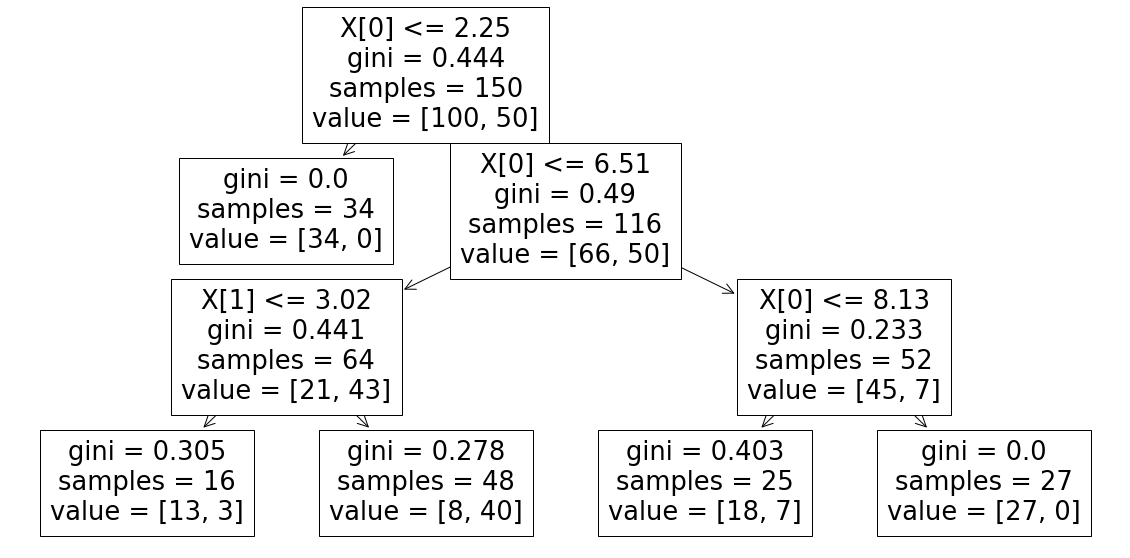

In [45]:
plt.figure(figsize=(20,10))
tree_description = plot_tree(dt);

In [46]:
tree_description[:3]

[Text(0.375, 0.875, 'X[0] <= 2.25\ngini = 0.444\nsamples = 150\nvalue = [100, 50]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 34\nvalue = [34, 0]'),
 Text(0.5, 0.625, 'X[0] <= 6.51\ngini = 0.49\nsamples = 116\nvalue = [66, 50]')]

In [47]:
y_out = dt.predict(X_test)
y_out[:3]

array([1, 0, 0], dtype=int64)

In [48]:
print(classification_report(y_true=y_test, y_pred=y_out, target_names=['0','1']))


              precision    recall  f1-score   support

           0       0.79      0.75      0.77        36
           1       0.44      0.50      0.47        14

    accuracy                           0.68        50
   macro avg       0.62      0.62      0.62        50
weighted avg       0.69      0.68      0.69        50



In [49]:
data = {
 'Сезон': ['Весна', 'Лето', 'Осень', 'Зима'], 
 'Пол': ['Мужской', 'Женский', 'Мужской', 'Женский'],
 'Образование': ['Начальное', 'Среднее', 'Высшее', 'Среднее'],
 'Value': [1,2,3,4]
}
df = pd.DataFrame(data)
df.head()

,Сезон,Пол,Образование,Value
0,Весна,Мужской,Начальное,1
1,Лето,Женский,Среднее,2
2,Осень,Мужской,Высшее,3
3,Зима,Женский,Среднее,4


In [50]:
cat_features = ['Сезон', 'Пол', 'Образование']

In [51]:
encoder = OneHotEncoder(sparse=False)
encoder.fit(df[cat_features].values)

OneHotEncoder(sparse=False)

In [52]:
encoder.categories_

[array(['Весна', 'Зима', 'Лето', 'Осень'], dtype=object),
 array(['Женский', 'Мужской'], dtype=object),
 array(['Высшее', 'Начальное', 'Среднее'], dtype=object)]

In [53]:
features = encoder.transform(df[cat_features].values)
features

array([[1., 0., 0., 0., 0., 1., 0., 1., 0.],
       [0., 0., 1., 0., 1., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 1., 1., 0., 0.],
       [0., 1., 0., 0., 1., 0., 0., 0., 1.]])

In [54]:
encoder.inverse_transform(features)

array([['Весна', 'Мужской', 'Начальное'],
       ['Лето', 'Женский', 'Среднее'],
       ['Осень', 'Мужской', 'Высшее'],
       ['Зима', 'Женский', 'Среднее']], dtype=object)

In [55]:
pd.get_dummies(df[cat_features])

,Сезон_Весна,Сезон_Зима,Сезон_Лето,Сезон_Осень,Пол_Женский,Пол_Мужской,Образование_Высшее,Образование_Начальное,Образование_Среднее
0,1,0,0,0,0,1,0,1,0
1,0,0,1,0,1,0,0,0,1
2,0,0,0,1,0,1,1,0,0
3,0,1,0,0,1,0,0,0,1


In [56]:
pd.concat([df.drop(cat_features, axis=1), pd.get_dummies(df[cat_features])], axis=1)

,Value,Сезон_Весна,Сезон_Зима,Сезон_Лето,Сезон_Осень,Пол_Женский,Пол_Мужской,Образование_Высшее,Образование_Начальное,Образование_Среднее
0,1,1,0,0,0,0,1,0,1,0
1,2,0,0,1,0,1,0,0,0,1
2,3,0,0,0,1,0,1,1,0,0
3,4,0,1,0,0,1,0,0,0,1
